# Understand Gradient Accumulation 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [205]:
from sklearn.metrics import accuracy_score

# Simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        return self.fc(x)
    
# Neural network with one hidden layer
class Model(nn.Module):
    def __init__(self, seed=4744):
        super(Model, self).__init__()
        if seed is not None:
            torch.manual_seed(seed)
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.output(x)
        # x = self.sigmoid(x)
        return x


# Function to train the model with gradient accumulation and validate it
def train_and_validate_model(grad_accum_steps, epochs=10, batch_size=16):
    model = Model() 
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.05)
    
    model.train()
    
    train_losses = []
    val_losses = []
    val_accuracies = []

    
    for epoch in range(epochs):  # Train for 2 epochs for demonstration
        optimizer.zero_grad()
        for batch_idx, i in enumerate(range(0, len(train_data), batch_size)):
            inputs = train_data[i:i+batch_size]
            targets = train_targets[i:i+batch_size]

        # for i in range(len(train_data)):
        #     inputs = train_data[i].unsqueeze(0)
        #     target = train_targets[i].unsqueeze(0)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            
            # if (i + batch_size) % grad_accum_steps == 0:
            if (batch_idx + 1) % grad_accum_steps == 0:

                optimizer.step()
                optimizer.zero_grad()
        
        # Print the loss for the last batch
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {loss.item():.4f}", end=" ")
        train_losses.append(loss.item())
        
        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(val_data)
            val_loss = criterion(val_outputs, val_targets)
            print(f"| Validation Loss: {val_loss.item():.4f}", end=" ")
            val_predictions = (val_outputs > 0.5).float()
            val_accuracy = accuracy_score(val_targets.numpy(), val_predictions.numpy())
            print(f"| Validation Accuracy: {val_accuracy:.4f}")
            val_losses.append(val_loss.item())
            val_accuracies.append(val_accuracy)
            
        model.train()
    # print(f"{val_targets}\n{val_outputs=}")

    return train_losses, val_losses, val_accuracies


## Moon data 
Emulating a complex data

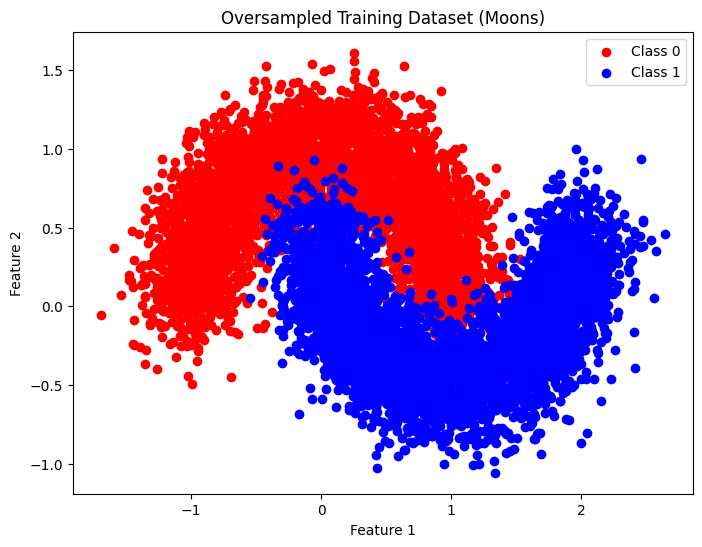

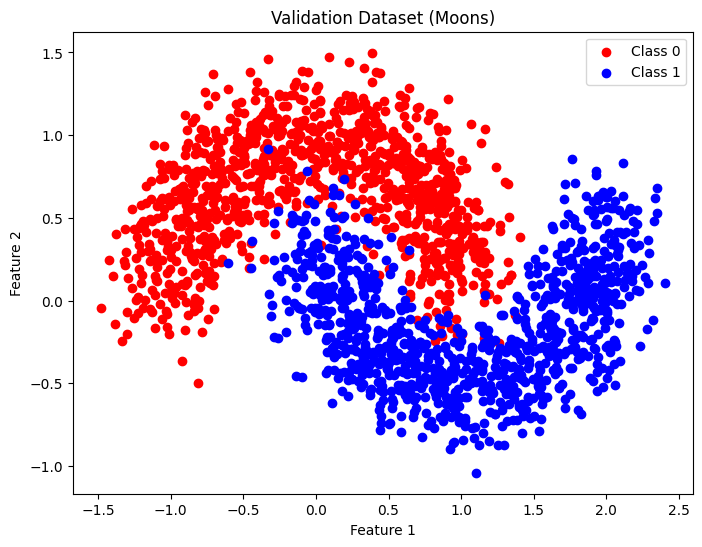

Shape of X_oversampled: (8000, 2)
Shape of y_oversampled: (8000,)
Shape of X_val: (2000, 2)
Shape of y_val: (2000,)


In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate a complex dataset using make_moons
X, y = make_moons(n_samples=10_000, noise=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the training data to 1000 datapoints using numpy
X_oversampled = np.tile(X_train, (int(1000 / len(X_train)) + 1, 1))
y_oversampled = np.tile(y_train, int(1000 / len(y_train)) + 1)

# Plot the oversampled training dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_oversampled[y_oversampled == 0][:, 0], X_oversampled[y_oversampled == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_oversampled[y_oversampled == 1][:, 0], X_oversampled[y_oversampled == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Oversampled Training Dataset (Moons)')
plt.legend()
plt.show()

# Plot the validation dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Validation Dataset (Moons)')
plt.legend()
plt.show()

# Print the shape of the datasets
print("Shape of X_oversampled:", X_oversampled.shape)
print("Shape of y_oversampled:", y_oversampled.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)


In [207]:
train_data = torch.tensor(X_oversampled, dtype=torch.float32)
train_targets = torch.tensor(y_oversampled, dtype=torch.float32).unsqueeze(1)
val_data = torch.tensor(X_val, dtype=torch.float32)
val_targets = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

In [209]:
# Train with small gradient accumulation steps (e.g., 1)
print("Training with small gradient accumulation steps (1):")
train_losses, val_losses, val_accuracies = train_and_validate_model(grad_accum_steps=1, epochs=10, batch_size=32)



Training with small gradient accumulation steps (1):
Epoch [1/10] | Loss: 0.4648 | Validation Loss: 0.3977 | Validation Accuracy: 0.8465
Epoch [2/10] | Loss: 0.3458 | Validation Loss: 0.2854 | Validation Accuracy: 0.8850
Epoch [3/10] | Loss: 0.3127 | Validation Loss: 0.2602 | Validation Accuracy: 0.8915
Epoch [4/10] | Loss: 0.3050 | Validation Loss: 0.2532 | Validation Accuracy: 0.8925
Epoch [5/10] | Loss: 0.3021 | Validation Loss: 0.2497 | Validation Accuracy: 0.8930
Epoch [6/10] | Loss: 0.3002 | Validation Loss: 0.2473 | Validation Accuracy: 0.8945
Epoch [7/10] | Loss: 0.2984 | Validation Loss: 0.2452 | Validation Accuracy: 0.8960
Epoch [8/10] | Loss: 0.2967 | Validation Loss: 0.2432 | Validation Accuracy: 0.8980
Epoch [9/10] | Loss: 0.2951 | Validation Loss: 0.2413 | Validation Accuracy: 0.8990
Epoch [10/10] | Loss: 0.2934 | Validation Loss: 0.2394 | Validation Accuracy: 0.9010


In [ ]:
# Function to train and validate the model with different gradient accumulation steps
def find_optimal_grad_accum_steps(steps_list, epochs=100, batch_size=32):
    results = {}
    for steps in steps_list:
        print(f"Training with gradient accumulation steps: {steps}")
        train_losses, val_losses, val_accuracies = train_and_validate_model(grad_accum_steps=steps, epochs=epochs, batch_size=batch_size)
        results[steps] = (train_losses, val_losses, val_accuracies)
    return results

def print_plots(results):
    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    for steps, (train_losses, val_losses, val_accuracies) in results.items():
        plt.plot(val_losses, label=f'Validation Loss (Accum Steps={steps})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Log Scale)')
    plt.yscale('log')
    plt.legend()
    plt.title('Validation Losses with Different Gradient Accumulation Steps (Log Scale)')
    plt.show()

    plt.figure(figsize=(12, 6))
    for steps, (train_losses, val_losses, val_accuracies) in results.items():
        plt.plot(val_accuracies, label=f'Validation Accuracy (Accum Steps={steps})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    # plt.yscale('log')
    plt.legend()
    plt.title('Validation Accuracy with Different Gradient Accumulation Steps.')
    plt.show()

    steps_list = list(results.keys())

    # Plot the last item in the results for each gradient accumulation step
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:red'
    ax1.set_xlabel('Gradient Accumulation Steps')
    ax1.set_ylabel('Loss', color=color)
    category = [str(steps) for steps in steps_list]
    # ax1.set_xticks(category)
    ax1.set_xticklabels(category)
    ax1.set_yscale('log')

    train_losses_last = [results[steps][0][-1] for steps in steps_list]
    val_losses_last = [results[steps][1][-1] for steps in steps_list]

    ax1.plot(category, train_losses_last, label='Train Loss', color='tab:red', linestyle='--', marker='o')
    ax1.plot(category, val_losses_last, label='Validation Loss', color='tab:blue', linestyle='--', marker='x')
    ax1.tick_params(axis='y', labelcolor=color)
    # ax1.yscale('log')


    ax2 = ax1.twinx()  
    color = 'tab:green'
    ax2.set_ylabel('Accuracy', color=color)  
    val_accuracies_last = [results[steps][2][-1] for steps in steps_list]
    ax2.plot(category, val_accuracies_last, label='Validation Accuracy', color=color, linestyle='--', marker='s')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    plt.title('Training Loss, Validation Loss, and Validation Accuracy with Different Gradient Accumulation Steps')
    plt.show()

    for grad_iter in results.keys():
        print(f"Grad Accum : {grad_iter:>10} | Train Loss : {results[grad_iter][0][-1]:.4f} | Valid Loss : {results[grad_iter][1][-1]:.4f} | Valid Accuracy : {results[grad_iter][2][-1]:.4f}")


Training with gradient accumulation steps: 1
Epoch [1/100] | Loss: 0.4648 | Validation Loss: 0.3977 | Validation Accuracy: 0.8465
Epoch [2/100] | Loss: 0.3458 | Validation Loss: 0.2854 | Validation Accuracy: 0.8850
Epoch [3/100] | Loss: 0.3127 | Validation Loss: 0.2602 | Validation Accuracy: 0.8915
Epoch [4/100] | Loss: 0.3050 | Validation Loss: 0.2532 | Validation Accuracy: 0.8925
Epoch [5/100] | Loss: 0.3021 | Validation Loss: 0.2497 | Validation Accuracy: 0.8930
Epoch [6/100] | Loss: 0.3002 | Validation Loss: 0.2473 | Validation Accuracy: 0.8945
Epoch [7/100] | Loss: 0.2984 | Validation Loss: 0.2452 | Validation Accuracy: 0.8960
Epoch [8/100] | Loss: 0.2967 | Validation Loss: 0.2432 | Validation Accuracy: 0.8980
Epoch [9/100] | Loss: 0.2951 | Validation Loss: 0.2413 | Validation Accuracy: 0.8990
Epoch [10/100] | Loss: 0.2934 | Validation Loss: 0.2394 | Validation Accuracy: 0.9010
Epoch [11/100] | Loss: 0.2916 | Validation Loss: 0.2376 | Validation Accuracy: 0.9010
Epoch [12/100] | L

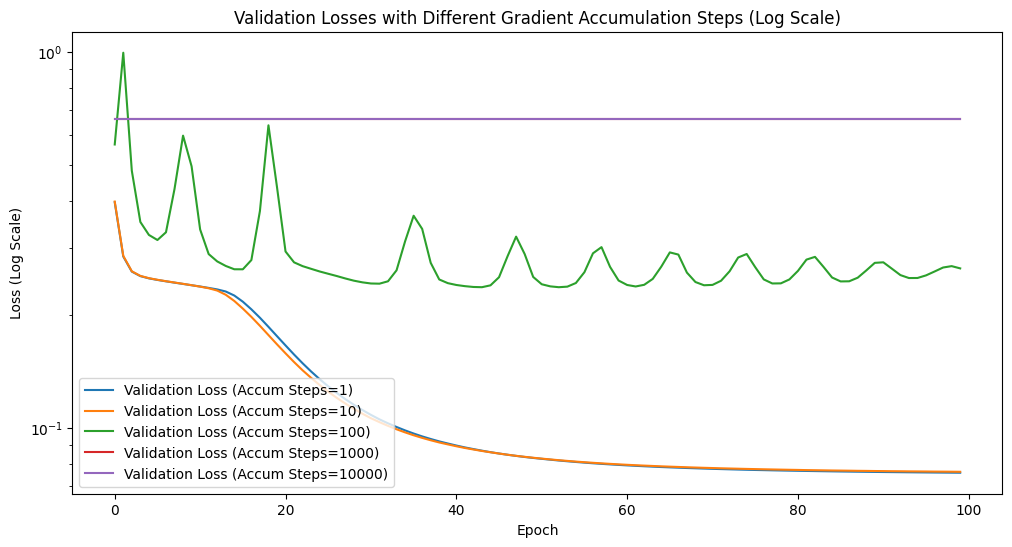

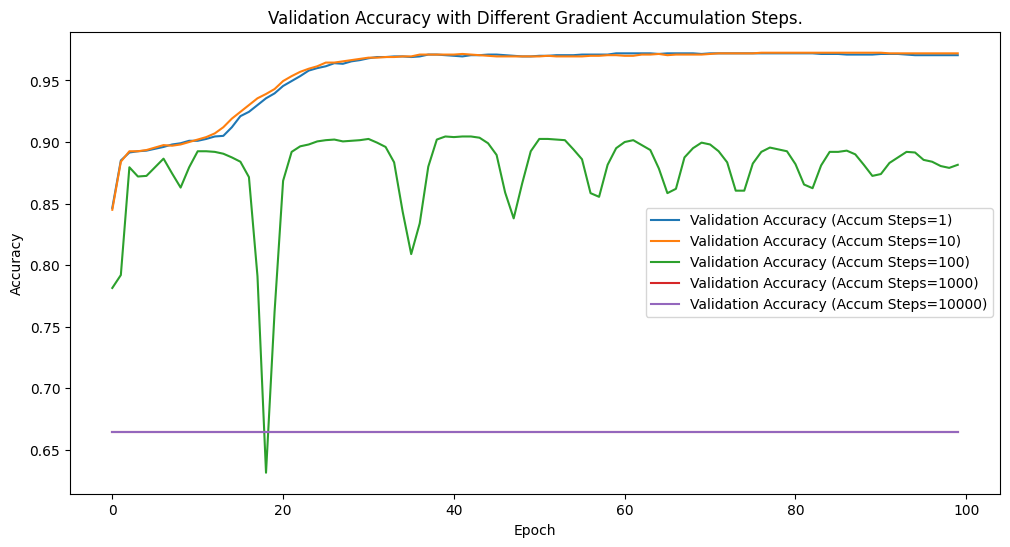

/var/folders/_p/mllb_hbs44z4j6b8plpzj_t00000gp/T/ipykernel_51028/3227865954.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category)


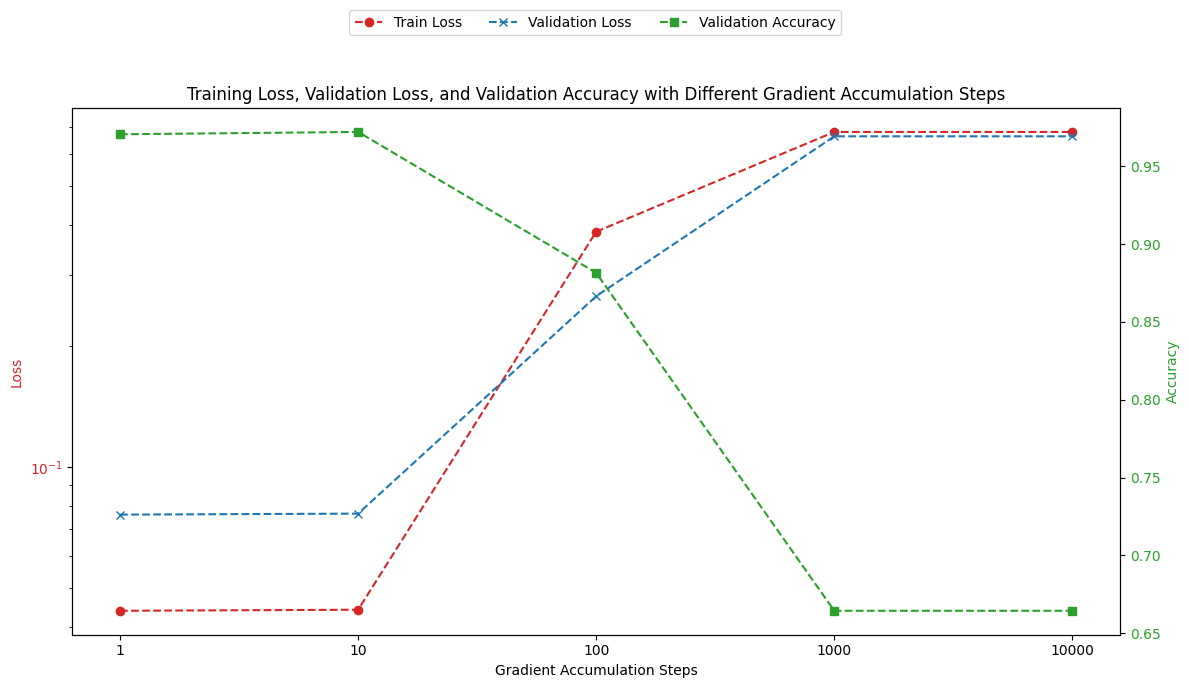

Grad Accum :          1 | Train Loss : 0.0439 | Valid Loss : 0.0760 | Valid Accuracy : 0.9705
Grad Accum :         10 | Train Loss : 0.0441 | Valid Loss : 0.0765 | Valid Accuracy : 0.9720
Grad Accum :        100 | Train Loss : 0.3839 | Valid Loss : 0.2654 | Valid Accuracy : 0.8815
Grad Accum :       1000 | Train Loss : 0.6795 | Valid Loss : 0.6627 | Valid Accuracy : 0.6645
Grad Accum :      10000 | Train Loss : 0.6795 | Valid Loss : 0.6627 | Valid Accuracy : 0.6645


In [224]:

# List of gradient accumulation steps to try
steps_list = [
    1, 
    10, 
    100, 
    1000,
    10_000
]

# Find the optimal gradient accumulation steps
results = find_optimal_grad_accum_steps(steps_list=steps_list, epochs=100, batch_size=32)
print_plots(results=results)

Training with gradient accumulation steps: 1
Epoch [1/100] | Loss: 0.4648 | Validation Loss: 0.3977 | Validation Accuracy: 0.8465
Epoch [2/100] | Loss: 0.3458 | Validation Loss: 0.2854 | Validation Accuracy: 0.8850
Epoch [3/100] | Loss: 0.3127 | Validation Loss: 0.2602 | Validation Accuracy: 0.8915
Epoch [4/100] | Loss: 0.3050 | Validation Loss: 0.2532 | Validation Accuracy: 0.8925
Epoch [5/100] | Loss: 0.3021 | Validation Loss: 0.2497 | Validation Accuracy: 0.8930
Epoch [6/100] | Loss: 0.3002 | Validation Loss: 0.2473 | Validation Accuracy: 0.8945
Epoch [7/100] | Loss: 0.2984 | Validation Loss: 0.2452 | Validation Accuracy: 0.8960
Epoch [8/100] | Loss: 0.2967 | Validation Loss: 0.2432 | Validation Accuracy: 0.8980
Epoch [9/100] | Loss: 0.2951 | Validation Loss: 0.2413 | Validation Accuracy: 0.8990
Epoch [10/100] | Loss: 0.2934 | Validation Loss: 0.2394 | Validation Accuracy: 0.9010
Epoch [11/100] | Loss: 0.2916 | Validation Loss: 0.2376 | Validation Accuracy: 0.9010
Epoch [12/100] | L

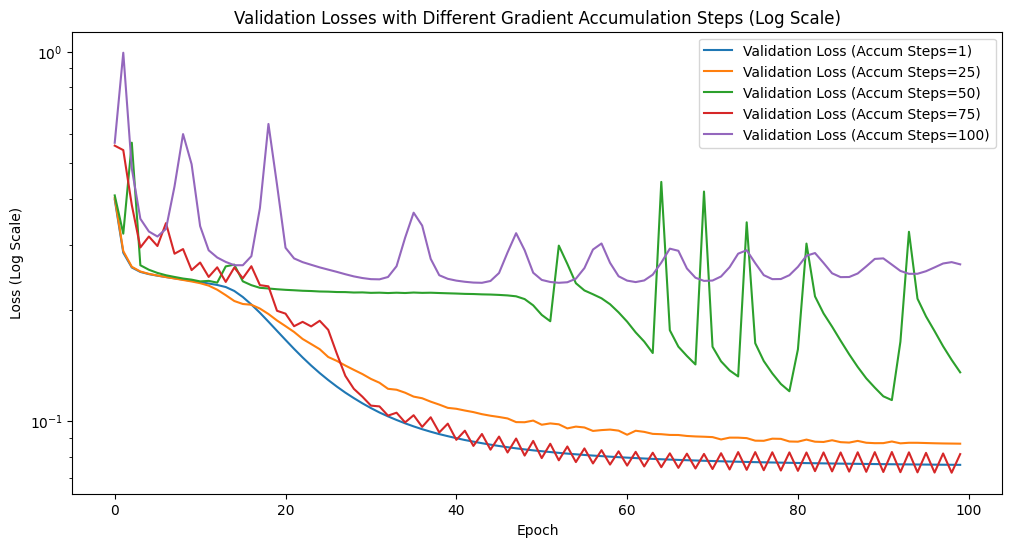

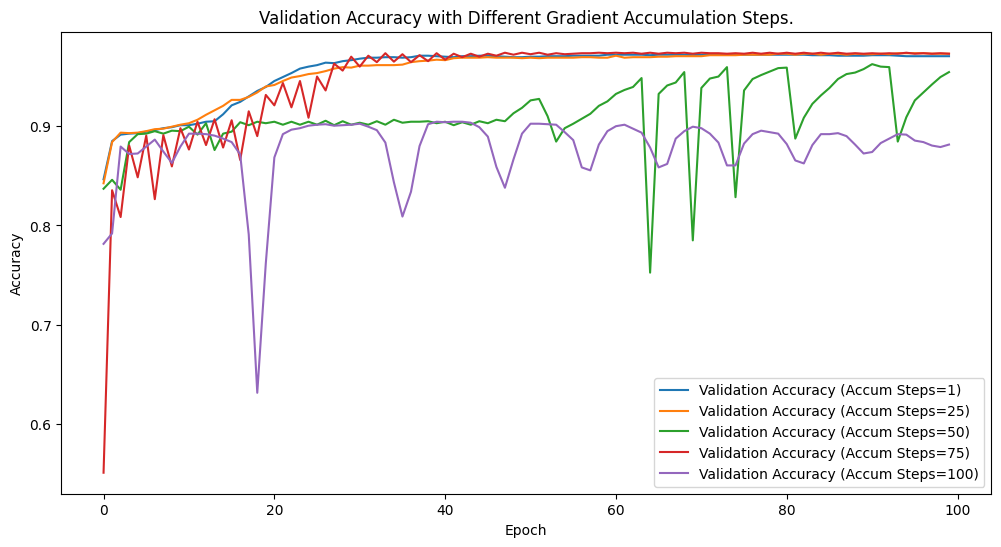

/var/folders/_p/mllb_hbs44z4j6b8plpzj_t00000gp/T/ipykernel_51028/3227865954.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category)


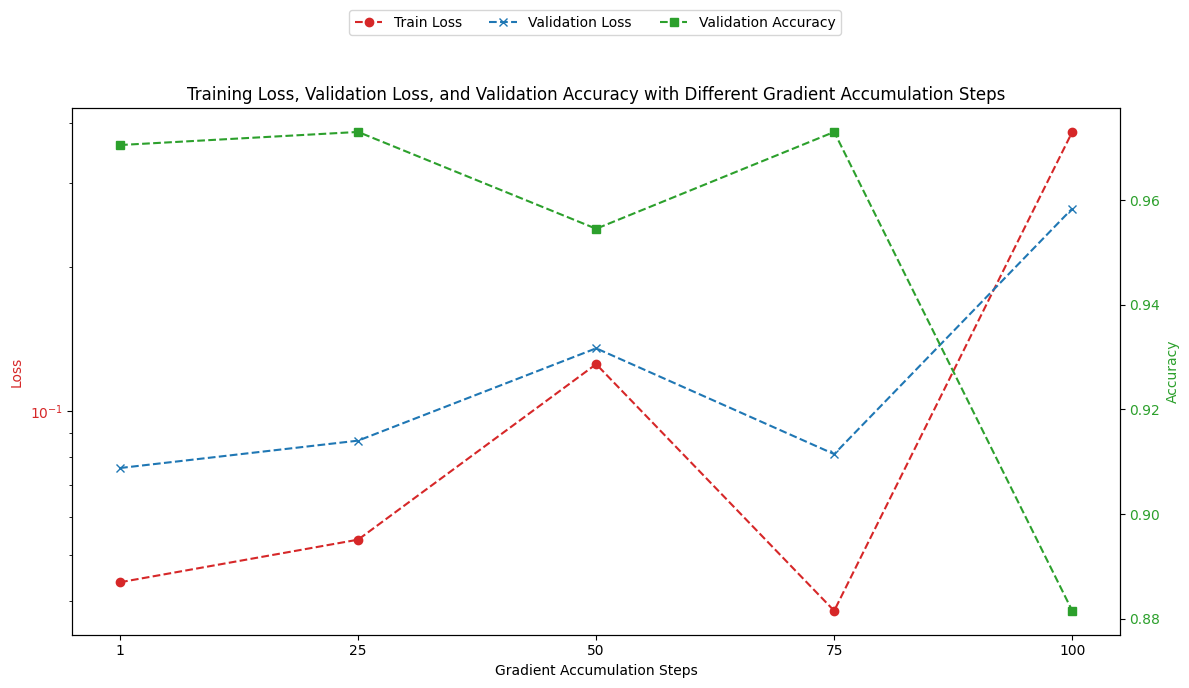

Grad Accum :          1 | Train Loss : 0.0439 | Valid Loss : 0.0760 | Valid Accuracy : 0.9705
Grad Accum :         25 | Train Loss : 0.0539 | Valid Loss : 0.0868 | Valid Accuracy : 0.9730
Grad Accum :         50 | Train Loss : 0.1254 | Valid Loss : 0.1354 | Valid Accuracy : 0.9545
Grad Accum :         75 | Train Loss : 0.0382 | Valid Loss : 0.0813 | Valid Accuracy : 0.9730
Grad Accum :        100 | Train Loss : 0.3839 | Valid Loss : 0.2654 | Valid Accuracy : 0.8815


In [225]:

# List of gradient accumulation steps to try
steps_list = [
    1, 
    25, 
    50, 75, 100,
]

# Find the optimal gradient accumulation steps
results = find_optimal_grad_accum_steps(steps_list=steps_list, epochs=100, batch_size=32)
print_plots(results=results)

Training with gradient accumulation steps: 1
Epoch [1/100] | Loss: 0.4648 | Validation Loss: 0.3977 | Validation Accuracy: 0.8465
Epoch [2/100] | Loss: 0.3458 | Validation Loss: 0.2854 | Validation Accuracy: 0.8850
Epoch [3/100] | Loss: 0.3127 | Validation Loss: 0.2602 | Validation Accuracy: 0.8915
Epoch [4/100] | Loss: 0.3050 | Validation Loss: 0.2532 | Validation Accuracy: 0.8925
Epoch [5/100] | Loss: 0.3021 | Validation Loss: 0.2497 | Validation Accuracy: 0.8930
Epoch [6/100] | Loss: 0.3002 | Validation Loss: 0.2473 | Validation Accuracy: 0.8945
Epoch [7/100] | Loss: 0.2984 | Validation Loss: 0.2452 | Validation Accuracy: 0.8960
Epoch [8/100] | Loss: 0.2967 | Validation Loss: 0.2432 | Validation Accuracy: 0.8980
Epoch [9/100] | Loss: 0.2951 | Validation Loss: 0.2413 | Validation Accuracy: 0.8990
Epoch [10/100] | Loss: 0.2934 | Validation Loss: 0.2394 | Validation Accuracy: 0.9010
Epoch [11/100] | Loss: 0.2916 | Validation Loss: 0.2376 | Validation Accuracy: 0.9010
Epoch [12/100] | L

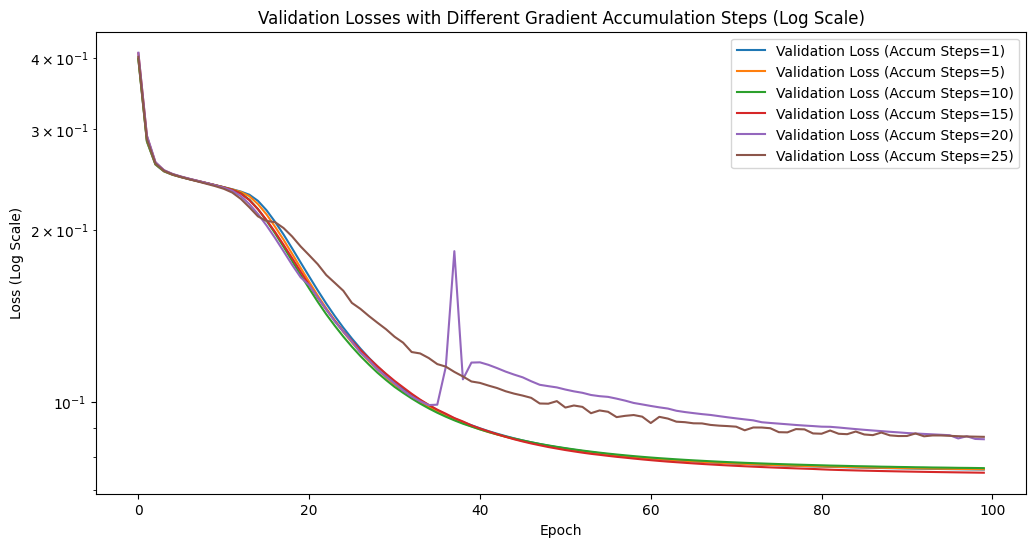

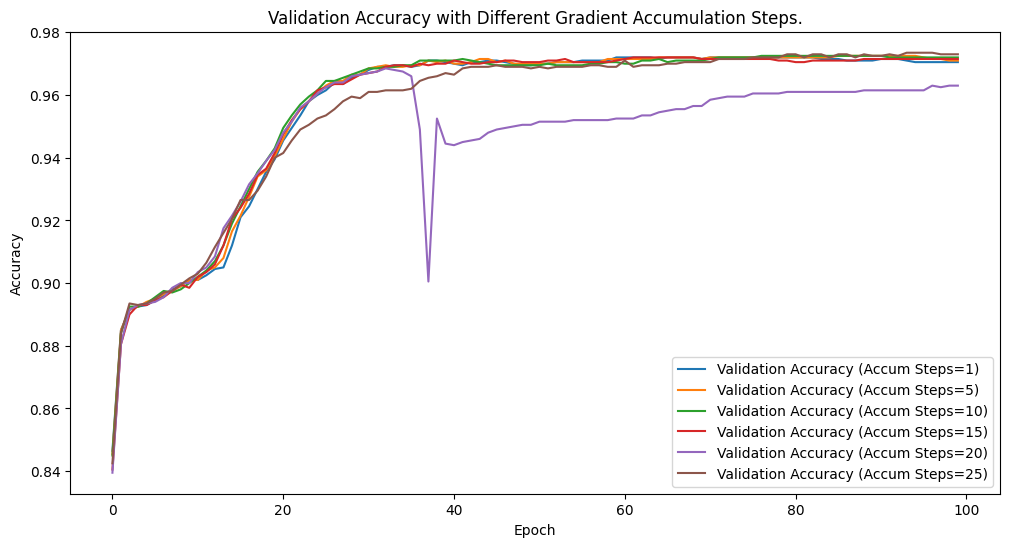

/var/folders/_p/mllb_hbs44z4j6b8plpzj_t00000gp/T/ipykernel_51028/3227865954.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category)


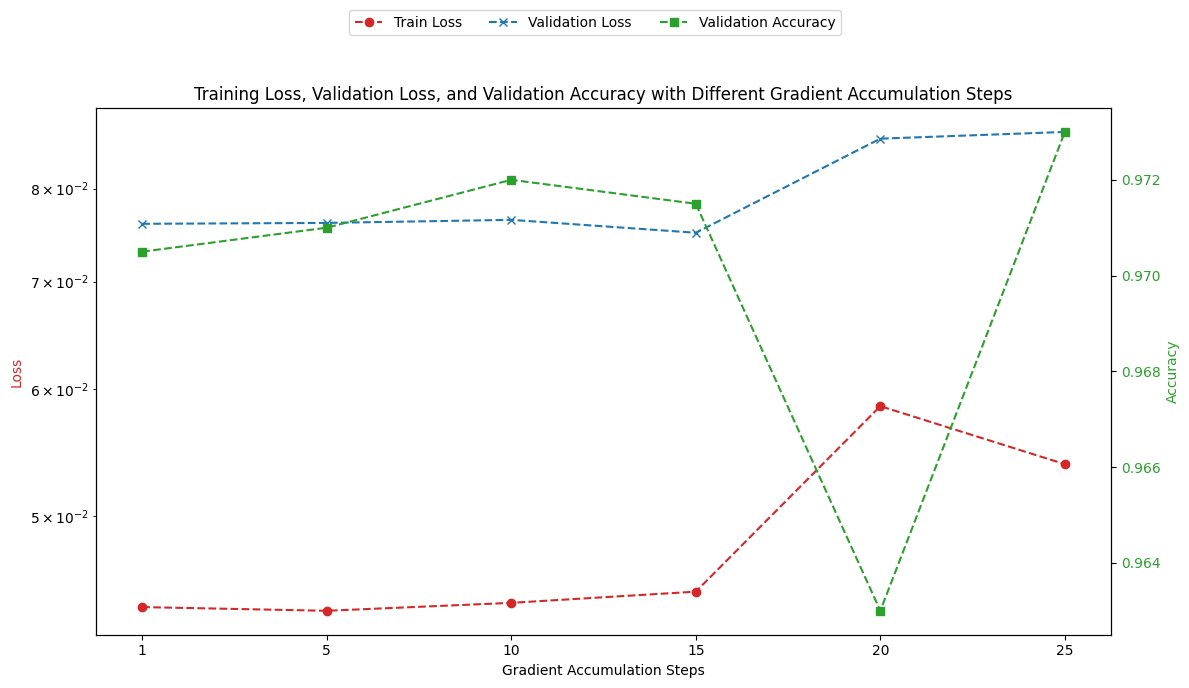

Grad Accum :          1 | Train Loss : 0.0439 | Valid Loss : 0.0760 | Valid Accuracy : 0.9705
Grad Accum :          5 | Train Loss : 0.0436 | Valid Loss : 0.0761 | Valid Accuracy : 0.9710
Grad Accum :         10 | Train Loss : 0.0441 | Valid Loss : 0.0765 | Valid Accuracy : 0.9720
Grad Accum :         15 | Train Loss : 0.0448 | Valid Loss : 0.0751 | Valid Accuracy : 0.9715
Grad Accum :         20 | Train Loss : 0.0585 | Valid Loss : 0.0859 | Valid Accuracy : 0.9630
Grad Accum :         25 | Train Loss : 0.0539 | Valid Loss : 0.0868 | Valid Accuracy : 0.9730


In [226]:

# List of gradient accumulation steps to try
steps_list = [
    1, 
    5, 
    10, 
    15,
    20, 25
]

# Find the optimal gradient accumulation steps
results = find_optimal_grad_accum_steps(steps_list=steps_list, epochs=100, batch_size=32)
print_plots(results=results)

## XOR Data 
(Emulating lower variant data)

In [228]:
import numpy as np
from sklearn.utils import shuffle


# Construct XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Oversample XOR data to 1000 datapoints using numpy
X_oversampled = np.tile(X, (2500, 1))
y_oversampled = np.tile(y, 2500)

X_oversampled, y_oversampled = shuffle(X_oversampled, y_oversampled, random_state=0)

print("Oversampled data:")
print("X_oversampled shape:", X_oversampled.shape)
print("y_oversampled shape:", y_oversampled.shape)


train_data = torch.tensor(X_oversampled, dtype=torch.float32)
train_targets = torch.tensor(y_oversampled, dtype=torch.float32).unsqueeze(1)
val_data = torch.tensor(X, dtype=torch.float32)
val_targets = torch.tensor(y, dtype=torch.float32).unsqueeze(1)


Oversampled data:
X_oversampled shape: (10000, 2)
y_oversampled shape: (10000,)


Training with gradient accumulation steps: 1
Epoch [1/10] | Loss: 0.4776 | Validation Loss: 0.4509 | Validation Accuracy: 0.7500
Epoch [2/10] | Loss: 0.1732 | Validation Loss: 0.1618 | Validation Accuracy: 1.0000
Epoch [3/10] | Loss: 0.0757 | Validation Loss: 0.0702 | Validation Accuracy: 1.0000
Epoch [4/10] | Loss: 0.0431 | Validation Loss: 0.0397 | Validation Accuracy: 1.0000
Epoch [5/10] | Loss: 0.0285 | Validation Loss: 0.0261 | Validation Accuracy: 1.0000
Epoch [6/10] | Loss: 0.0206 | Validation Loss: 0.0188 | Validation Accuracy: 1.0000
Epoch [7/10] | Loss: 0.0158 | Validation Loss: 0.0144 | Validation Accuracy: 1.0000
Epoch [8/10] | Loss: 0.0126 | Validation Loss: 0.0115 | Validation Accuracy: 1.0000
Epoch [9/10] | Loss: 0.0104 | Validation Loss: 0.0095 | Validation Accuracy: 1.0000
Epoch [10/10] | Loss: 0.0088 | Validation Loss: 0.0080 | Validation Accuracy: 1.0000
Training with gradient accumulation steps: 10
Epoch [1/10] | Loss: 0.4953 | Validation Loss: 0.4788 | Validation A

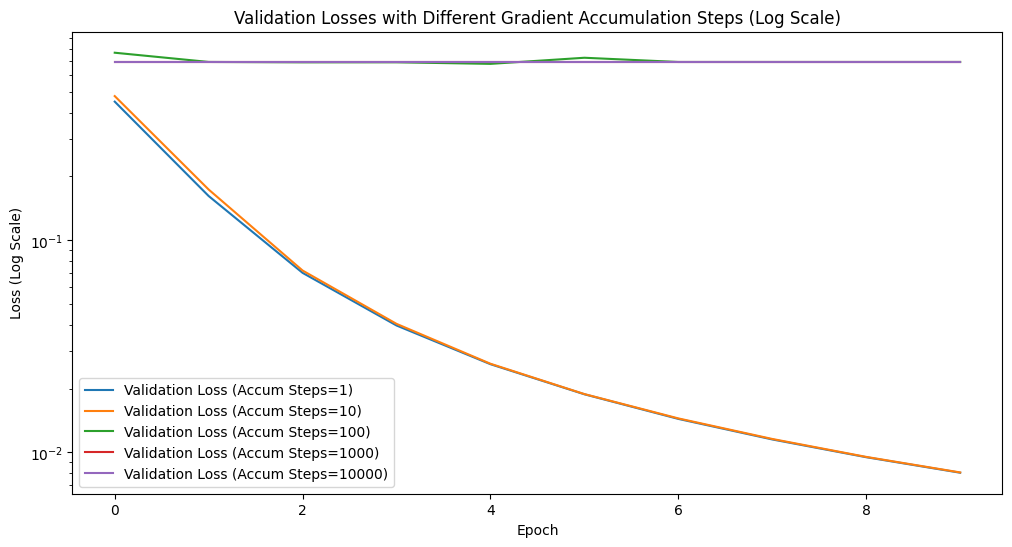

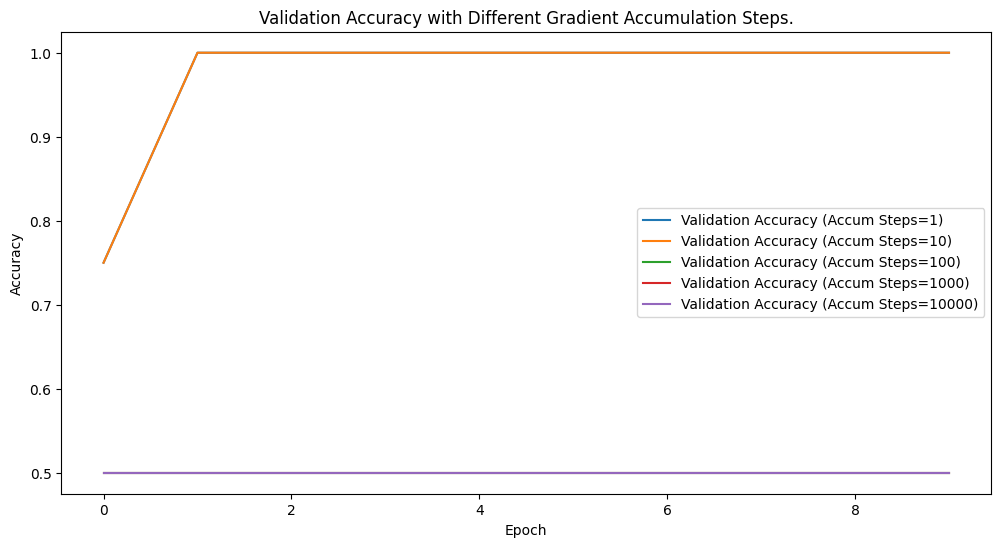

/var/folders/_p/mllb_hbs44z4j6b8plpzj_t00000gp/T/ipykernel_51028/3227865954.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category)


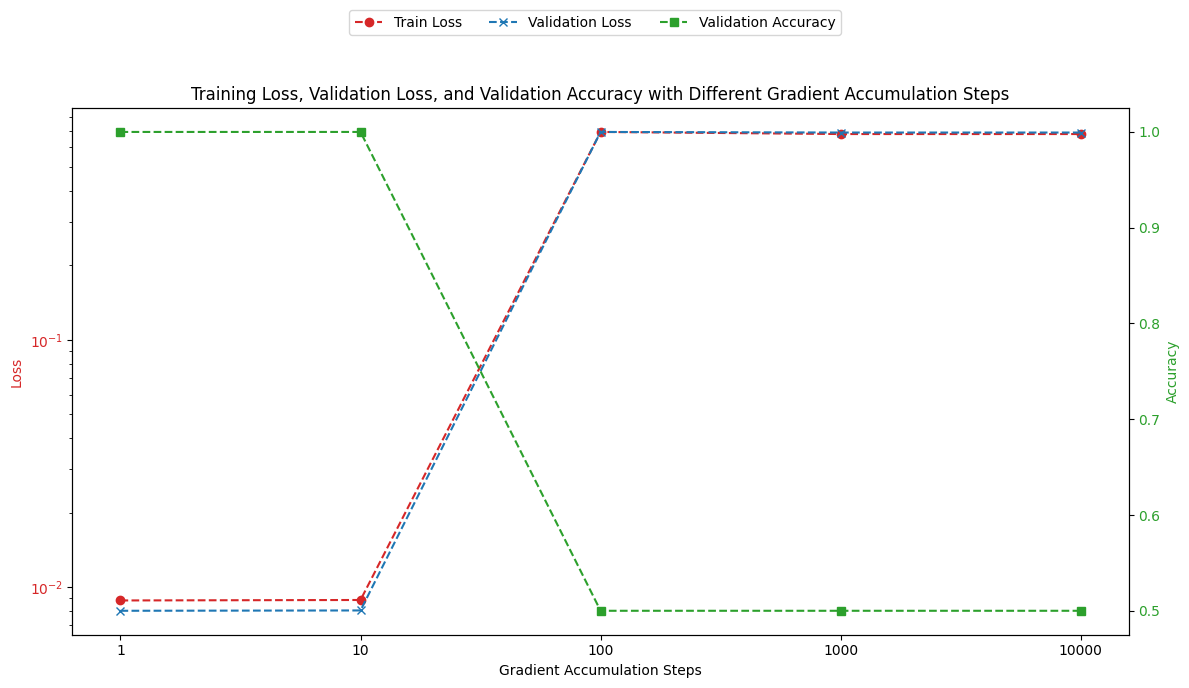

Grad Accum :          1 | Train Loss : 0.0088 | Valid Loss : 0.0080 | Valid Accuracy : 1.0000
Grad Accum :         10 | Train Loss : 0.0089 | Valid Loss : 0.0080 | Valid Accuracy : 1.0000
Grad Accum :        100 | Train Loss : 0.6935 | Valid Loss : 0.6935 | Valid Accuracy : 0.5000
Grad Accum :       1000 | Train Loss : 0.6801 | Valid Loss : 0.6897 | Valid Accuracy : 0.5000
Grad Accum :      10000 | Train Loss : 0.6801 | Valid Loss : 0.6897 | Valid Accuracy : 0.5000


In [230]:

# List of gradient accumulation steps to try
steps_list = [
    1, 
    10, 
    100, 
    1000,
    10_000
]

# Find the optimal gradient accumulation steps
results = find_optimal_grad_accum_steps(steps_list=steps_list, epochs=10, batch_size=32)
print_plots(results=results)

Training with gradient accumulation steps: 1
Epoch [1/10] | Loss: 0.4776 | Validation Loss: 0.4509 | Validation Accuracy: 0.7500
Epoch [2/10] | Loss: 0.1732 | Validation Loss: 0.1618 | Validation Accuracy: 1.0000
Epoch [3/10] | Loss: 0.0757 | Validation Loss: 0.0702 | Validation Accuracy: 1.0000
Epoch [4/10] | Loss: 0.0431 | Validation Loss: 0.0397 | Validation Accuracy: 1.0000
Epoch [5/10] | Loss: 0.0285 | Validation Loss: 0.0261 | Validation Accuracy: 1.0000
Epoch [6/10] | Loss: 0.0206 | Validation Loss: 0.0188 | Validation Accuracy: 1.0000
Epoch [7/10] | Loss: 0.0158 | Validation Loss: 0.0144 | Validation Accuracy: 1.0000
Epoch [8/10] | Loss: 0.0126 | Validation Loss: 0.0115 | Validation Accuracy: 1.0000
Epoch [9/10] | Loss: 0.0104 | Validation Loss: 0.0095 | Validation Accuracy: 1.0000
Epoch [10/10] | Loss: 0.0088 | Validation Loss: 0.0080 | Validation Accuracy: 1.0000
Training with gradient accumulation steps: 2
Epoch [1/10] | Loss: 0.4815 | Validation Loss: 0.4549 | Validation Ac

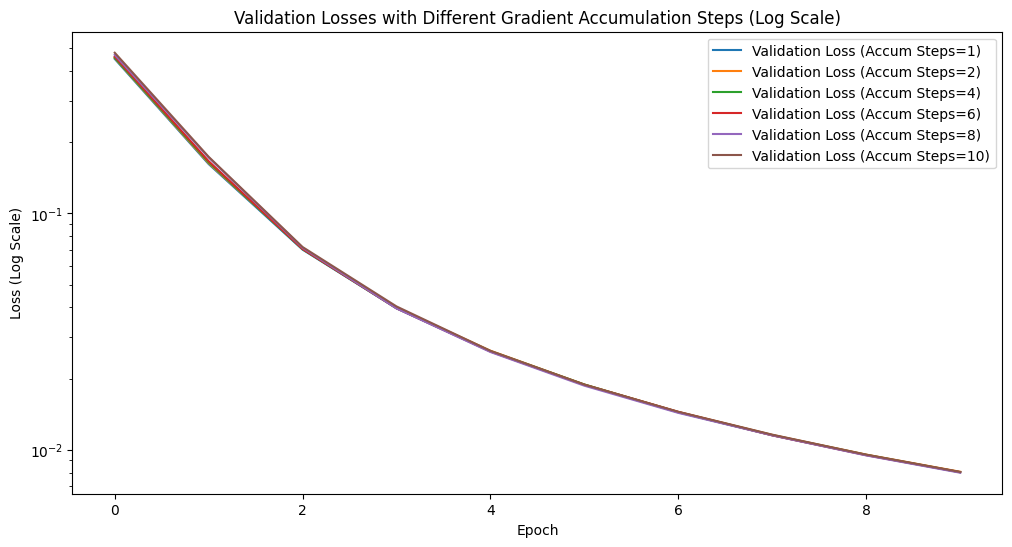

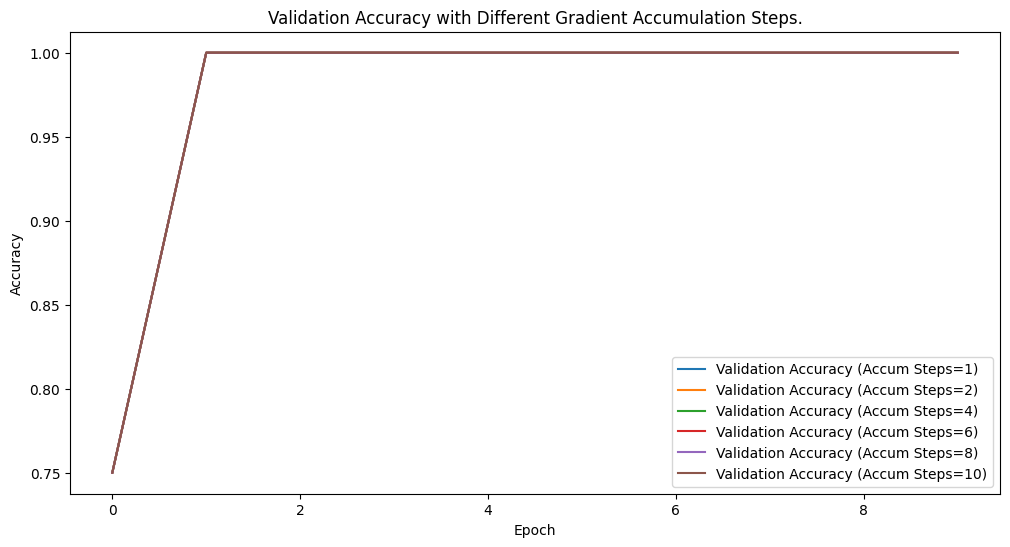

/var/folders/_p/mllb_hbs44z4j6b8plpzj_t00000gp/T/ipykernel_51028/3227865954.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category)


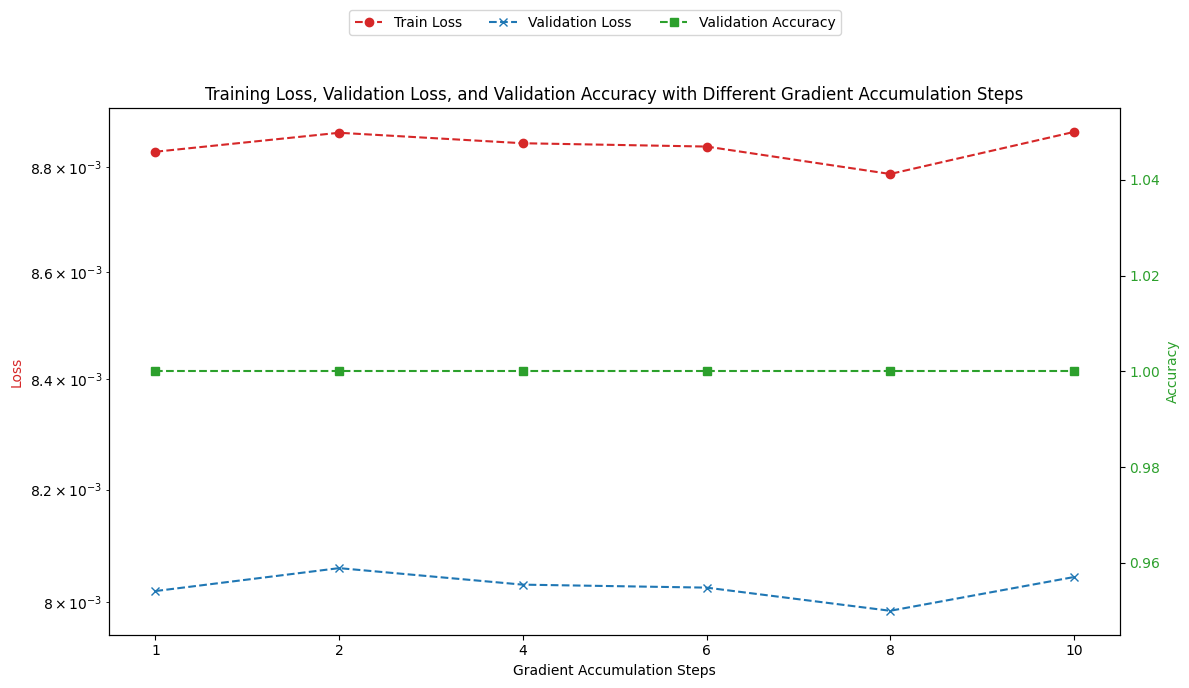

Grad Accum :          1 | Train Loss : 0.0088 | Valid Loss : 0.0080 | Valid Accuracy : 1.0000
Grad Accum :          2 | Train Loss : 0.0089 | Valid Loss : 0.0081 | Valid Accuracy : 1.0000
Grad Accum :          4 | Train Loss : 0.0088 | Valid Loss : 0.0080 | Valid Accuracy : 1.0000
Grad Accum :          6 | Train Loss : 0.0088 | Valid Loss : 0.0080 | Valid Accuracy : 1.0000
Grad Accum :          8 | Train Loss : 0.0088 | Valid Loss : 0.0080 | Valid Accuracy : 1.0000
Grad Accum :         10 | Train Loss : 0.0089 | Valid Loss : 0.0080 | Valid Accuracy : 1.0000


In [231]:

# List of gradient accumulation steps to try
steps_list = [
    1, 
    2, 
    4, 
    6,
    8, 10
]

# Find the optimal gradient accumulation steps
results = find_optimal_grad_accum_steps(steps_list=steps_list, epochs=10, batch_size=32)
print_plots(results=results)

Training with gradient accumulation steps: 1
Epoch [1/10] | Loss: 0.0030 | Validation Loss: 0.0015 | Validation Accuracy: 1.0000
Epoch [2/10] | Loss: 0.0012 | Validation Loss: 0.0006 | Validation Accuracy: 1.0000
Epoch [3/10] | Loss: 0.0007 | Validation Loss: 0.0004 | Validation Accuracy: 1.0000
Epoch [4/10] | Loss: 0.0005 | Validation Loss: 0.0003 | Validation Accuracy: 1.0000
Epoch [5/10] | Loss: 0.0004 | Validation Loss: 0.0002 | Validation Accuracy: 1.0000
Epoch [6/10] | Loss: 0.0003 | Validation Loss: 0.0002 | Validation Accuracy: 1.0000
Epoch [7/10] | Loss: 0.0003 | Validation Loss: 0.0001 | Validation Accuracy: 1.0000
Epoch [8/10] | Loss: 0.0002 | Validation Loss: 0.0001 | Validation Accuracy: 1.0000
Epoch [9/10] | Loss: 0.0002 | Validation Loss: 0.0001 | Validation Accuracy: 1.0000
Epoch [10/10] | Loss: 0.0002 | Validation Loss: 0.0001 | Validation Accuracy: 1.0000
Training with gradient accumulation steps: 10
Epoch [1/10] | Loss: 0.0060 | Validation Loss: 0.0036 | Validation A

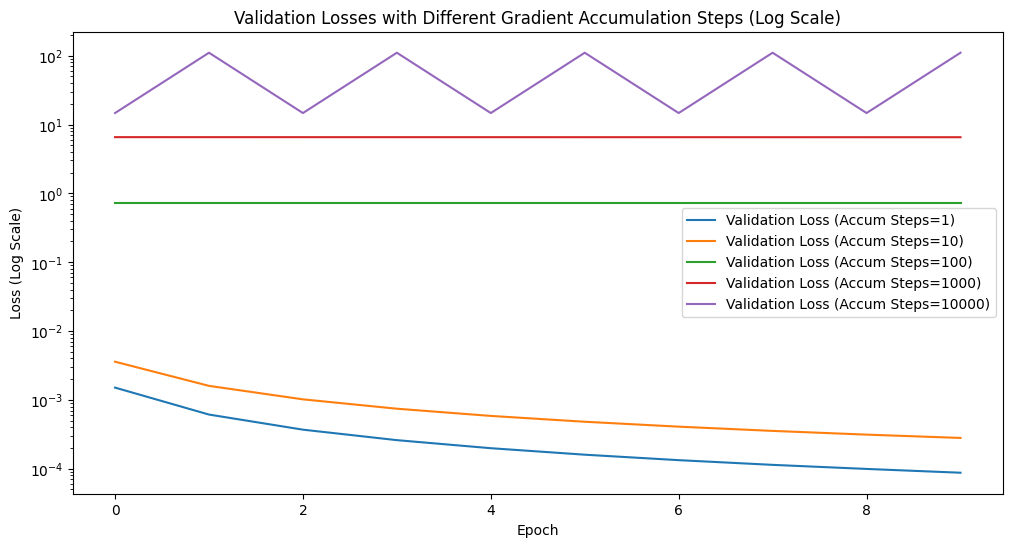

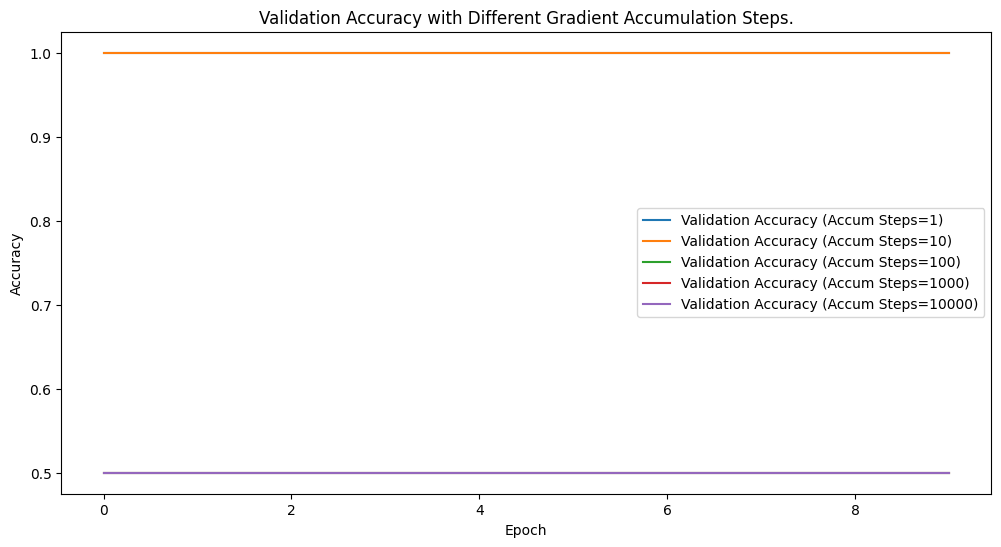

/var/folders/_p/mllb_hbs44z4j6b8plpzj_t00000gp/T/ipykernel_51028/3227865954.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category)


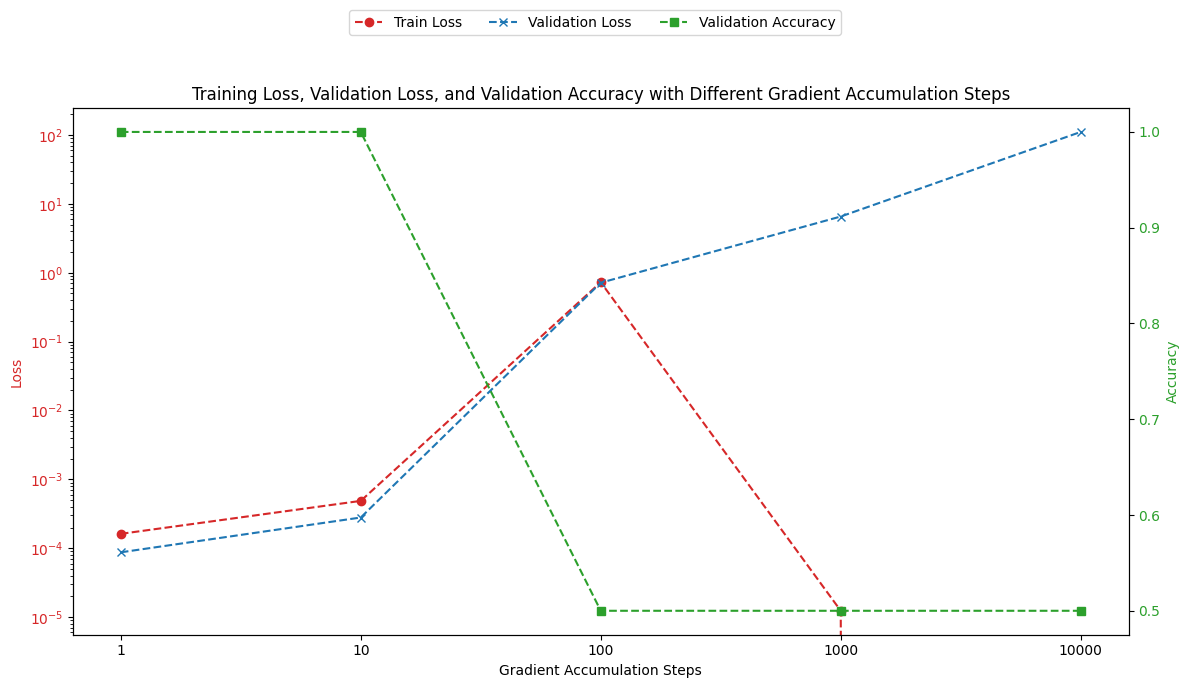

Grad Accum :          1 | Train Loss : 0.0002 | Valid Loss : 0.0001 | Valid Accuracy : 1.0000
Grad Accum :         10 | Train Loss : 0.0005 | Valid Loss : 0.0003 | Valid Accuracy : 1.0000
Grad Accum :        100 | Train Loss : 0.7271 | Valid Loss : 0.7147 | Valid Accuracy : 0.5000
Grad Accum :       1000 | Train Loss : 0.0000 | Valid Loss : 6.5347 | Valid Accuracy : 0.5000
Grad Accum :      10000 | Train Loss : 0.0000 | Valid Loss : 110.3271 | Valid Accuracy : 0.5000


In [234]:

# List of gradient accumulation steps to try
steps_list = [
    1, 
    10, 
    100, 
    1000,
    10_000
]

# Find the optimal gradient accumulation steps
results = find_optimal_grad_accum_steps(steps_list=steps_list, epochs=10, batch_size=1)
print_plots(results=results)